In [1]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib. pyplot as plt
import numpy as np
import random
import math
import numpy, scipy.spatial.distance as dist
from scipy.interpolate import griddata
%matplotlib inline

#### 2) De partículas a una malla. Usa la rutina scipy.interpolate.griddata. Sugerencia revisa el ejemplo de las notas de clase y el de la página anterior.

a) Crea una malla de 100x100, e interpola los datos del anillo y de los multiples anillos a esta malla. Grafíca los datos de la malla como gráfica de densidad y pon los puntos originales encimados. Llamaremos a esta malla y sus valores, el campo. Utiliza los tres métodos de interpolación: más cercano, lineal y cúbico 1D.

In [2]:
# Función para crear malla:
def malla_cuadrada(tamaño,ret): 
    DD = [] 
    DD = open('Tabla_Datos_malla.dat',"w")  #abrimos un scrip para manejar los datos.
    c, d = 0, 0
    for i in range(int(tamaño/ret)+1): 
        for j in range(int(tamaño/ret)+1):
            c, d  = i*ret, j*ret #acomoda los puntos en y
            DD.write("%f  \t%f \n" % (c,d))
    DD.close()
    return np.loadtxt('Tabla_Datos_malla.dat')

In [3]:
#Funcion para hacer un anillo:
def anillo_random(rad_ex,rad_in,puntos,centro):
    D = []
    D = open('Tabla_Datos_Aro.dat',"w")  #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        r = pow(random.randrange(rad_in**2,rad_ex**2,1),0.5)  #puntos aleatorios en un radio interior y uno exterior
        th = random.random()*2*math.pi
        x = r*math.cos(th) + centro
        y = r*math.sin(th)+ centro
        D.write("%f  \t%f \n" % (x,y))
    D.close()
    return np.loadtxt('Tabla_Datos_Aro.dat') # u = RR_1[:,0] y v = RR_1[:,1]

In [4]:
#Función para hacer anillos randoom
def anillos_randoms_2(num_anillos, puntos, tam_caja):
     
    D_5 = []
    D_5 = open('Tabla_Datos_anillos_aleatorios2.dat',"w")  #abrimos un scrip para manejar los datos.
    
    rad_in = tam_caja/5
    rad_ext = 1 + rad_in
    
    for i in range(num_anillos):
        r_x0 = random.randrange(0,tam_caja,1) # coordenada x donde se ubicará el anillo
        r_y0 = random.randrange(0,tam_caja,1) # coordenada y donde se ubicará el anillo
        
        for j in range(puntos):
            r = pow(random.randrange(rad_in**2,rad_ext**2,1),0.5)
            th = random.random()*2*math.pi
            x = r*math.cos(th) + r_x0
            y = r*math.sin(th) + r_y0
            if 0<x<tam_caja and 0<y<tam_caja:
                D_5.write("%f  \t%f \n" % (x,y))
    D_5.close()
    
    return np.loadtxt('Tabla_Datos_anillos_aleatorios2.dat')

In [5]:
#creamos malla de 100x100 
dimencion = 100
reticula = 8
malla = malla_cuadrada(dimencion,reticula)

In [6]:
rad_ex = 30
rad_in = 25
puntos = 450
centro = 50
anillo = anillo_random(rad_ex,rad_in,puntos,centro)

In [7]:
#creamos anillos randoom en una caja de 100x100 
n_anillos = 10
n_puntos = 30
tam_caja = 100
anillo_r = anillos_randoms_2(n_anillos,n_puntos,tam_caja)

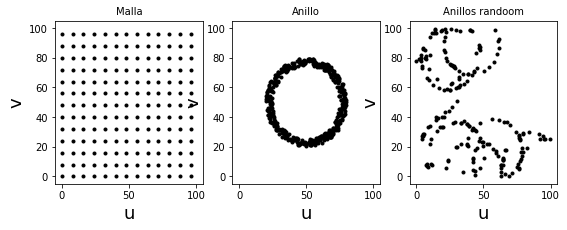

In [8]:
#graficamos la malla y los anillos 
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.title('Malla',fontsize=10)
plt.plot(malla[:,0],malla[:,1],'k.')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.xlim(-5,105)
plt.ylim(-5,105)
plt.subplot(1,3,2)
plt.title('Anillo',fontsize=10)
plt.plot(anillo[:,0],anillo[:,1],'k.')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.xlim(-5,105)
plt.ylim(-5,105)
plt.subplot(1,3,3)
plt.title('Anillos randoom',fontsize=10)
plt.plot(anillo_r[:,0],anillo_r[:,1],'k.')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.xlim(-5,105)
plt.ylim(-5,105)
plt.show()

Interpolamos los datos del anillo y de los multiples anillos a esta malla.

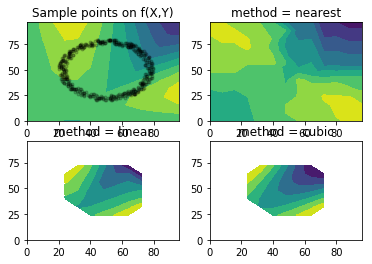

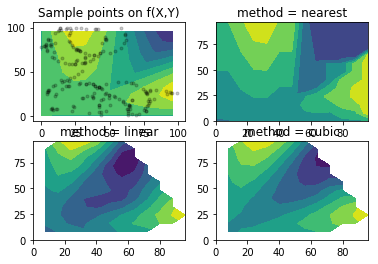

In [14]:
x = malla[:,0]
y = malla[:,1]
X, Y = np.meshgrid(x,y)

def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

T = f(X, Y)

npts = 400
px_1, py_1 =anillo[:,0], anillo[:,1]
px_2, py_2 =anillo_r[:,0], anillo_r[:,1]

fig, ax = plt.subplots(nrows=2, ncols=2)
# Plot the model function and the randomly selected sample points
ax[0,0].contourf(X, Y, T)
ax[0,0].scatter(px_1, py_1, c='k', alpha=0.2, marker='.')
ax[0,0].set_title('Sample points on f(X,Y)')

# Interpolate using three different methods and plot
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px_1, py_1), f(px_1,py_1), (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title('method = {}'.format(method))

plt.show()

fig, ax = plt.subplots(nrows=2, ncols=2)
# Plot the model function and the randomly selected sample points
ax[0,0].contourf(X, Y, T)
ax[0,0].scatter(px_2, py_2, c='k', alpha=0.2, marker='.')
ax[0,0].set_title('Sample points on f(X,Y)')

# Interpolate using three different methods and plot
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px_2, py_2), f(px_2,py_2), (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title('method = {}'.format(method))

plt.show()